PUC Minas - Pontifícia Universidade Católica de Minas Gerais

Pós-Graduação em Ciência de Dados e Big Data

TRABALHO DE CONCLUSÃO DE CURSO

Aluna: Lilian Campos Soares

Matrícula: 1092883

Este notebook é referente aos códigos elaborados em Python e utilizados no Trabalho de Conclusão de Curso em Ciência de Dados e Big Data da Pós-Graduação da PUC Minas, especificamente para a criação dos modelos de Machine Learning.

In [1]:
#Carregamento de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carregamento do pacote com funções estatísticas
import scipy.stats as stats

#Carregamento do pacote Sklearn
import sklearn.metrics as m
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#na EPL
#import io
#import os
#os.chdir("C:/TCC PUC/csv")

In [3]:
# Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [4]:
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [4]:
#Importação dos dados para início da preparação do modelo de ML - arquivos acidentes.CSV
acidentes_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg3.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory = False, parse_dates = ['data_inversa'])

In [5]:
acidentes_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91789 entries, 0 to 91788
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      91789 non-null  int64         
 1   pesid                   91789 non-null  int64         
 2   data_inversa            91789 non-null  datetime64[ns]
 3   dia_semana              91789 non-null  object        
 4   horario                 91789 non-null  object        
 5   uf                      91789 non-null  object        
 6   br                      91789 non-null  int64         
 7   km                      91789 non-null  int64         
 8   municipio               91789 non-null  object        
 9   causa_acidente          91789 non-null  object        
 10  tipo_acidente           91789 non-null  object        
 11  classificacao_acidente  91789 non-null  object        
 12  fase_dia                91789 non-null  object

In [171]:
#Verificação de valores nulos / NaN nas colunas
acidentes_mg.isnull().sum()
#sem valores nulos / NaN

id                        0
pesid                     0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
tipo_veiculo              0
tipo_envolvido            0
estado_fisico             0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
elemento_transito         0
dtype: int64

In [9]:
acidentes_mg['estado_fisico'].value_counts()

Ileso            37895
Lesões Leves     36078
Lesões Graves    10022
Não Informado     4837
Óbito             2957
Name: estado_fisico, dtype: int64

In [10]:
acidentes_mg['km'] = acidentes_mg['km'].astype(float)

In [11]:
#Escolha dos atributos para um novo dataset chamado 'fset'
fset = acidentes_mg[['dia_semana','br','km','causa_acidente','tipo_acidente','classificacao_acidente','fase_dia', 'condicao_metereologica', 'tipo_pista','tracado_via','uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo', 'elemento_transito']].copy()
fset.head()

,dia_semana,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,elemento_transito
0,domingo,381,605.0,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Condutor,Lesões Leves,Masculino,Homem
1,domingo,381,605.0,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,Homem
2,domingo,262,368.0,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Masculino,Homem
3,domingo,262,368.0,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Feminino,Homem
4,domingo,262,368.0,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Condutor,Lesões Leves,Masculino,Homem


In [12]:
#Tratamento dos registros que o estado_fisico está como Não Informado
f = fset.loc[fset['estado_fisico'] == 'Não Informado'].index
fset.drop(f, axis= 0, inplace = True)

In [13]:
#Alocação de variáveis preditoras
X = fset[['dia_semana','br','km','causa_acidente','tipo_acidente','classificacao_acidente','fase_dia', 'condicao_metereologica', 'tipo_pista','tracado_via','uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'sexo', 'elemento_transito']].values

#Alocação da variável target
Y = fset['estado_fisico'].values

In [15]:
#Transformação de dados não numéricos em dados numéricos - utilização da função LabelEncoder do módulo preprocessing da biblioteca Scikit-learn
LE_Dia_Semana = preprocessing.LabelEncoder()
LE_Dia_Semana.fit(fset.dia_semana.unique())
X[:,0] = LE_Dia_Semana.transform(X[:,0])

In [16]:
LE_Causa = preprocessing.LabelEncoder()
LE_Causa.fit(fset.causa_acidente.unique())
X[:,3] = LE_Causa.transform(X[:,3])

In [17]:
LE_Tipo_Acidente = preprocessing.LabelEncoder()
LE_Tipo_Acidente.fit(fset.tipo_acidente.unique())
X[:,4] = LE_Tipo_Acidente.transform(X[:,4])

In [18]:
LE_Class_acidente = preprocessing.LabelEncoder()
LE_Class_acidente.fit(fset.classificacao_acidente.unique())
X[:,5] = LE_Class_acidente.transform(X[:,5])

In [19]:
LE_Fase_Dia = preprocessing.LabelEncoder()
LE_Fase_Dia.fit(fset.fase_dia.unique())
X[:,6] = LE_Fase_Dia.transform(X[:,6])

In [20]:
LE_Condicao_Met = preprocessing.LabelEncoder()
LE_Condicao_Met.fit(fset.condicao_metereologica.unique())
X[:,7] = LE_Condicao_Met.transform(X[:,7])

In [21]:
LE_Tipo_Pista = preprocessing.LabelEncoder()
LE_Tipo_Pista.fit(fset.tipo_pista.unique())
X[:,8] = LE_Tipo_Pista.transform(X[:,8])

In [22]:
LE_Tracado_Via = preprocessing.LabelEncoder()
LE_Tracado_Via.fit(fset.tracado_via.unique())
X[:,9] = LE_Tracado_Via.transform(X[:,9])

In [23]:
LE_Uso_Solo = preprocessing.LabelEncoder()
LE_Uso_Solo.fit(fset.uso_solo.unique())
X[:,10] = LE_Uso_Solo.transform(X[:,10])

In [24]:
LE_Tipo_Veiculo = preprocessing.LabelEncoder()
LE_Tipo_Veiculo.fit(fset.tipo_veiculo.unique())
X[:,11] = LE_Tipo_Veiculo.transform(X[:,11])

In [25]:
LE_Tipo_Envolvido = preprocessing.LabelEncoder()
LE_Tipo_Envolvido.fit(fset.tipo_envolvido.unique())
X[:,12] = LE_Tipo_Envolvido.transform(X[:,12])

In [26]:
LE_Sexo = preprocessing.LabelEncoder()
LE_Sexo.fit(fset.sexo.unique())
X[:,13] = LE_Sexo.transform(X[:,13])

In [27]:
LE_Elemento_Transito = preprocessing.LabelEncoder()
LE_Elemento_Transito.fit(fset.elemento_transito.unique())
X[:,14] = LE_Elemento_Transito.transform(X[:,14])

In [28]:
#Verificação de Y
print(Y)

['Lesões Leves' 'Lesões Leves' 'Lesões Leves' ... 'Lesões Graves' 'Ileso'
 'Ileso']


In [29]:
#Verificação de X
print(X)

[[0 381 605.0 ... 1 2 0]
 [0 381 605.0 ... 2 2 0]
 [0 262 368.0 ... 2 2 0]
 ...
 [4 116 648.0 ... 1 0 0]
 [4 116 648.0 ... 1 2 0]
 [5 153 7.0 ... 1 2 2]]


In [193]:
#Criação de um dataframe para a auxiliar na verificação de X e de sua distribuição de dados
dfx = pd.DataFrame(X)

In [194]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86952 entries, 0 to 86951
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       86952 non-null  object
 1   1       86952 non-null  object
 2   2       86952 non-null  object
 3   3       86952 non-null  object
 4   4       86952 non-null  object
 5   5       86952 non-null  object
 6   6       86952 non-null  object
 7   7       86952 non-null  object
 8   8       86952 non-null  object
 9   9       86952 non-null  object
 10  10      86952 non-null  object
 11  11      86952 non-null  object
 12  12      86952 non-null  object
 13  13      86952 non-null  object
 14  14      86952 non-null  object
dtypes: object(15)
memory usage: 10.0+ MB


In [195]:
dfx.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,381,605,7,15,1,0,1,0,5,0,0,1,2,0
1,0,381,605,7,15,1,0,1,0,5,0,0,2,2,0
2,0,262,368,32,5,1,2,1,2,9,1,0,2,2,0
3,0,262,368,32,5,1,2,1,2,9,1,0,2,0,0
4,0,262,368,32,5,1,2,1,2,9,1,0,1,2,0


In [196]:
dfx.count()

0     86952
1     86952
2     86952
3     86952
4     86952
5     86952
6     86952
7     86952
8     86952
9     86952
10    86952
11    86952
12    86952
13    86952
14    86952
dtype: int64

In [197]:
dfx.nunique()

0       7
1      21
2     950
3      33
4      17
5       3
6       4
7      10
8       3
9      10
10      2
11     21
12      5
13      4
14      3
dtype: int64

In [198]:
dfx.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [199]:
print(dfx.describe())

           0      1        2      3      4      5      6      7      8      9      10     11     12     13     14
count   86952  86952  86952.0  86952  86952  86952  86952  86952  86952  86952  86952  86952  86952  86952  86952
unique      7     21    950.0     33     17      3      4     10      3     10      2     21      5      4      3
top         5    381    510.0     16      9      1      3      1      2      5      0      0      1      2      0
freq    15313  27617    491.0  28510  17467  65797  49861  46412  46598  43599  61919  40017  56996  65633  72826


In [200]:
dfx.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\dfx.csv", index = False, header = True, sep=';', decimal='.', encoding = 'cp1252')

In [206]:
dfx = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\dfx2.csv", sep=';', decimal='.', encoding = 'cp1252')

In [207]:
dfx.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,0,381,605.0,7,15,1,0,1,0,5,0,0,1,2,0
1,0,381,605.0,7,15,1,0,1,0,5,0,0,2,2,0
2,0,262,368.0,32,5,1,2,1,2,9,1,0,2,2,0
3,0,262,368.0,32,5,1,2,1,2,9,1,0,2,0,0
4,0,262,368.0,32,5,1,2,1,2,9,1,0,1,2,0


In [208]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86952 entries, 0 to 86951
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col0    86952 non-null  int64  
 1   col1    86952 non-null  int64  
 2   col2    86952 non-null  float64
 3   col3    86952 non-null  int64  
 4   col4    86952 non-null  int64  
 5   col5    86952 non-null  int64  
 6   col6    86952 non-null  int64  
 7   col7    86952 non-null  int64  
 8   col8    86952 non-null  int64  
 9   col9    86952 non-null  int64  
 10  col10   86952 non-null  int64  
 11  col11   86952 non-null  int64  
 12  col12   86952 non-null  int64  
 13  col13   86952 non-null  int64  
 14  col14   86952 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 10.0 MB


In [209]:
print(dfx.describe())

             col0        col1        col2        col3        col4        col5        col6        col7        col8        col9       col10       col11       col12       col13       col14
count  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000  86952.0000
mean       2.9618    234.3929    458.9134     19.0324      9.1285      1.0576      2.4139      2.4975      1.0995      3.2484      0.2879      3.9606      1.3626      1.5190      0.2558
std        2.0172    142.9484    239.0857      8.5091      4.3668      0.4899      0.8180      2.8601      0.9810      2.2158      0.4528      5.5344      0.5187      0.8551      0.6139
min        0.0000     40.0000      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000      0.0000
25%        1.0000    116.0000    289.0000     15.0000      6.0000     

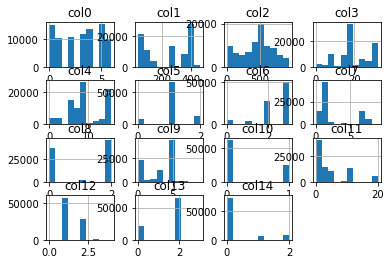

In [210]:
dfx.hist()
plt.show()

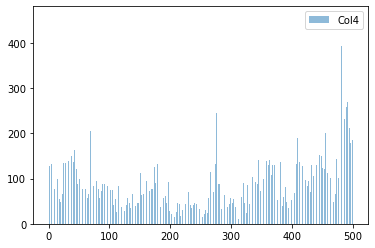

In [211]:
plt.hist(dfx['col2'], bins, alpha=0.5, label='Col4')
plt.legend(loc='upper right')
plt.show()

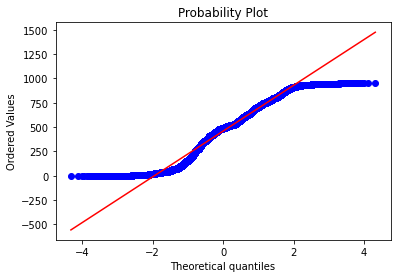

In [212]:
stats.probplot(dfx['col2'], dist="norm", plot=pylab)
pylab.show()

In [ ]:
#Normalização dos valores para uma melhor performance do algoritmo de classificação
#Foram efetuados testes com StandardScaler, MinMaxScaler e RobustScaler, mas optou-se pelo StandardScaler

In [30]:
#Normalização dos valores com StandardScaler
std = preprocessing.StandardScaler()
std.fit(X)
Xstd = std.transform(X)
print ('Média antes da normalização: {:.2f}'.format(X.mean()),'\nDesvio padrão antes da normalização: {:.2f}'.format(X.std()))
print('')
print ('Média depois da normalização: {:.2f}'.format(Xstd.mean()),'\nDesvio padrão depois da normalização: {:.2f}'.format(Xstd.std()))

Média antes da normalização: 49.48 
Desvio padrão antes da normalização: 143.08

Média depois da normalização: -0.00 
Desvio padrão depois da normalização: 1.00


In [ ]:
#Depois de normalizado, o array Xstd, que contém os valores para a predição, é dividido em 4 partes para treinamento e teste
#X_trainset: uma de treinamento do modelo, onde o algoritmo irá 'apreender' a relação entre as variáveis preditoras;
#Y_trainset: uma parte também de treinamento do modelo, mas somente com as variáveis alvo, ou os valores que queremos prever;
#X_testset: uma parte para teste, onde o modelo irá exercer o aprendizado obtido com os arrays X_trainset e Y_trainset, ou irá testar o que foi observado com os arrays de treinamento; e
#Y_testset: uma parte para avaliar o desempenho do modelo, em que Y_testset contém as saídas corretas que se deseja prever e é usado para comparar com as predições feitas pelo modelo.

In [32]:
#Divisão do dataset seguindo a proporção 70/30 (70% para treino e 30% para teste)
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(Xstd, Y, test_size=0.3, random_state=3)

In [216]:
#Teste com o algoritmo SGDClassifier
from sklearn.linear_model import SGDClassifier

In [277]:
#Comparação de Linear SVM sem SGD com o SGDClassifier
from sklearn.svm import SVC
import time
start = time.time()
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_trainset,Y_trainset)
stop = time.time()
print(f"Tempo de treinamento para linear SVM com SGD: {stop - start}s")

start = time.time()
clf = SVC(kernel='linear')
clf.fit(X_trainset,Y_trainset)
stop = time.time()
print(f"Tempo de treinamento para linear SVM sem SGD: {stop - start}s")
#SGD classifier executa bem mais rápido do que o Linear SVM

Tempo de treinamento para linear SVM com SGD: 3.3240966796875s
Tempo de treinamento para linear SVM sem SGD: 953.1051347255707s


In [278]:
#Regressão Logística (loss='log') com treinamento SGD do modelo
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(X_trainset,Y_trainset)

SGDClassifier(loss='log')

In [279]:
Y_Pred = clf.predict(X_testset)
print('Acurácia: {:.2f}'.format(accuracy_score(Y_testset, Y_Pred)))

Acurácia: 0.58


In [ ]:
#Verificando a influência sob o número de iterações
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(X_trainset,Y_trainset)
    scores.append(clf.score(X_testset, Y_testset))

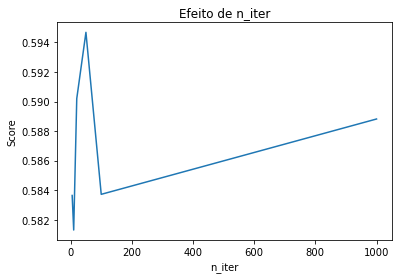

In [281]:
plt.title("Efeito de n_iter")
plt.xlabel("n_iter")
plt.ylabel("Score")
plt.plot(n_iters, scores) 

In [282]:
#Linear SVM (loss='hinge') com treinamento SGD do modelo
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_trainset,Y_trainset)

SGDClassifier()

In [283]:
Y_Pred = clf.predict(X_testset)
print('Acurácia: {:.2f}'.format(accuracy_score(Y_testset, Y_Pred)))

Acurácia: 0.59


In [ ]:
#Verificando a influência sob o número de iterações
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_trainset,Y_trainset)
    scores.append(clf.score(X_testset, Y_testset))

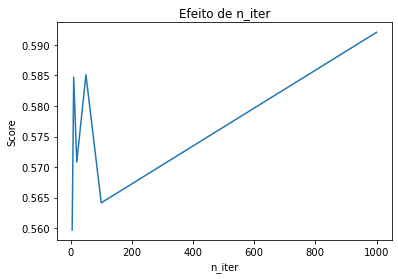

In [285]:
plt.title("Efeito de n_iter")
plt.xlabel("n_iter")
plt.ylabel("Score")
plt.plot(n_iters, scores)

In [264]:
#Comparação de desempenho "Performance" entre diferentes modelos lineares
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_trainset,Y_trainset)
    scores.append(clf.score(X_testset,Y_testset))

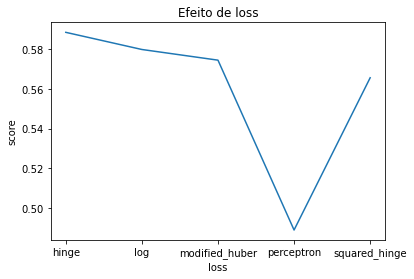

In [265]:
plt.title("Efeito de loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [270]:
#Encontrando os hyper parâmetros mais adequados por meio do método GridSearch
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=50)
grid = GridSearchCV(clf, param_grid=params, cv=10)

In [ ]:
grid.fit(X_trainset,Y_trainset)

In [273]:
print(grid.best_params_)

{'alpha': 0.01, 'loss': 'log', 'penalty': 'l1'}


In [274]:
grid_predictions = grid.predict(X_testset) 

print('Acurácia: {:.2f}'.format(accuracy_score(Y_testset, grid_predictions)))

Acurácia: 0.60


In [286]:
#Teste com o algoritmo SGDClassifier e os hyper parâmetros mais adequados
clf = SGDClassifier(loss="log", penalty="l1", alpha=0.01, max_iter=50)
clf.fit(X_trainset,Y_trainset)

SGDClassifier(alpha=0.01, loss='log', max_iter=50, penalty='l1')

In [287]:
Y_Pred = clf.predict(X_testset)
print('Acurácia: {:.2f}'.format(accuracy_score(Y_testset, Y_Pred)))

Acurácia: 0.60


In [292]:
#Armazenando as predições com dados de treino e dados de teste
pTrain = clf.predict(X_trainset)
pTest = clf.predict(X_testset)

In [327]:
#Import do módulo metrics da biblioteca sklearn
import sklearn.metrics as m

In [296]:
#Obtendo o Índice Jaccard dos dados de treino e de teste
print('Indice Jaccard p/ dados de Treino loss = log: {:.3f}%'.format(m.jaccard_score(Y_trainset, pTrain, average='micro')))
print('Indice Jaccard p/ dados de Teste loss = log: {:.3f}%'.format(m.jaccard_score(Y_testset, pTest, average='micro')))

Indice Jaccard p/ dados de Treino loss = log: 0.427%
Indice Jaccard p/ dados de Teste loss = log: 0.429%


In [297]:
#Verificando os erros de classificação nas amostras de treino e de teste
print('Erros de classificação das amostras Treino: {}'.format((Y_trainset != pTrain).sum()),'\nAmostras de treino "Y": {}'.format(Y_trainset.shape[0]))
print('Erros de classificação das amostras Teste: {}'.format((Y_testset != pTest).sum()),'\nAmostras de teste "Y": {}'.format(Y_testset.shape[0]))

Erros de classificação das amostras Treino: 24427 
Amostras de treino "Y": 60866
Erros de classificação das amostras Teste: 10436 
Amostras de teste "Y": 26086


In [6]:
#Matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label verdadeira')
    plt.xlabel('Label predita')

#retirada de um dos notebooks do curso de Machine learning da Cognitiveclass, assim como o bloco logo em seguida, que faz a chamada a função

In [368]:
#Cálculo da matriz de confusão
cnf_matrix = m.confusion_matrix(Y_testset, pTest, labels = fset.estado_fisico.unique())
np.set_printoptions(precision=2)

               precision    recall  f1-score   support

        Ileso       0.65      0.73      0.68     11379
Lesões Graves       0.00      0.00      0.00      3055
 Lesões Leves       0.55      0.69      0.61     10766
        Óbito       0.00      0.00      0.00       886

     accuracy                           0.60     26086
    macro avg       0.30      0.35      0.32     26086
 weighted avg       0.51      0.60      0.55     26086

Matriz de confusão sem normalização
[[7383 3383    0    0]
 [3112 8267    0    0]
 [1942 1113    0    0]
 [ 886    0    0    0]]


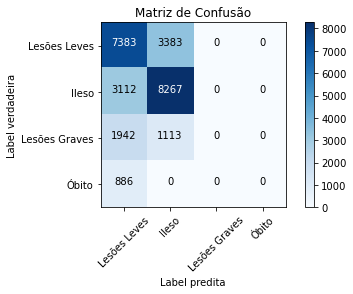

In [370]:
print (m.classification_report(Y_testset, pTest))

# Gráfico da matriz de confusão sem normalização
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= fset.estado_fisico.unique(), normalize= False,  title='Matriz de Confusão')

In [39]:
#Importando biliotecas para trabalhar com o algoritmo Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [115]:
#Teste com o algoritmo Decision Tree
dtclf = DecisionTreeClassifier()
dtclf.fit(X_trainset,Y_trainset)

DecisionTreeClassifier()

In [116]:
#Armazenamento de previões em duas variáveis: uma para os dados de treino e outra para os dados de teste
Y_PredTE = dtclf.predict(X_testset)
Y_PredTR = dtclf.predict(X_trainset)

In [117]:
#Verificando a acurácia nos dados de teste e de treino
print('Acurácia p/ dados de Teste: {:.2f}'.format(accuracy_score(Y_testset, Y_PredTE)))
print('Acurácia p/ dados de Treino: {:.2f}'.format(accuracy_score(Y_trainset, Y_PredTR)))

Acurácia p/ dados de Teste: 0.64
Acurácia p/ dados de Treino: 0.96


In [118]:
#Verificando erros de classificação nos dados de teste e de treino
print('Erros de classificação das amostras Teste: {}'.format((Y_testset != Y_PredTE).sum()),'\nAmostras de teste "y": {}'.format(Y_testset.shape[0]))
print('Erros de classificação das amostras Treino: {}'.format((Y_trainset != Y_PredTR).sum()),'\nAmostras de treino "y": {}'.format(Y_trainset.shape[0]))

Erros de classificação das amostras Teste: 9407 
Amostras de teste "y": 26086
Erros de classificação das amostras Treino: 2623 
Amostras de treino "y": 60866


In [119]:
#Obtendo o Índice Jaccard dos dados de teste e treino
print('Indice Jaccard p/ dados de Teste: {:.3f}%'.format(m.jaccard_score(Y_testset, Y_PredTE, average='micro')))
print('Indice Jaccard p/ dados de Treino: {:.3f}%'.format(m.jaccard_score(Y_trainset, Y_PredTR, average='micro')))

Indice Jaccard p/ dados de Teste: 0.470%
Indice Jaccard p/ dados de Treino: 0.917%


In [120]:
#Avaliação do modelo com cross validation
scores = cross_val_score(dtclf, X_trainset, Y_trainset, cv=10)
print("Média Cross-Validation: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )
#a acurácia não aumentou

Média Cross-Validation: 0.635 (std: 0.004)



In [374]:
#Encontrando os hyper parâmetros mais adequados por meio do método GridSearch
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 15, 20],
              "max_depth": [None, 2, 3, 5, 7, 10],
              "min_samples_leaf": [1, 3, 5, 7, 10],
              "max_leaf_nodes": [None, 3, 5, 7, 10, 15, 20],
              }

grid = GridSearchCV(dtclf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_trainset, Y_trainset)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              min_samples_split=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 5, 7, 10],
                         'max_leaf_nodes': [None, 3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [375]:
#O melhor score obtido entre todos os parâmetros
print(grid.best_score_)

0.7130583616107357


In [376]:
#Relação dos hyper parâmetros usados para gerar o melhor score
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 15}


In [121]:
#Teste com o algoritmo DecisionTree e os hyper parâmetros mais adequados
dtclf = DecisionTreeClassifier(criterion = 'gini', max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=15)
dtclf.fit(X_trainset,Y_trainset)
Y_PredTE = dtclf.predict(X_testset)
Y_PredTR = dtclf.predict(X_trainset)
print('Acurácia p/ dados de Teste: {:.2f}'.format(accuracy_score(Y_testset, Y_PredTE)))
print('Acurácia p/ dados de Treino: {:.2f}'.format(accuracy_score(Y_trainset, Y_PredTR)))
print('Erros de classificação das amostras Teste: {}'.format((Y_testset != Y_PredTE).sum()),'\nAmostras de teste "y": {}'.format(Y_testset.shape[0]))
print('Erros de classificação das amostras Treino: {}'.format((Y_trainset != Y_PredTR).sum()),'\nAmostras de treino "y": {}'.format(Y_trainset.shape[0]))
print('Indice Jaccard p/ dados de Teste: {:.3f}%'.format(m.jaccard_score(Y_testset, Y_PredTE, average='micro')))
print('Indice Jaccard p/ dados de Treino: {:.3f}%'.format(m.jaccard_score(Y_trainset, Y_PredTR, average='micro')))

Acurácia p/ dados de Teste: 0.71
Acurácia p/ dados de Treino: 0.72
Erros de classificação das amostras Teste: 7536 
Amostras de teste "y": 26086
Erros de classificação das amostras Treino: 16989 
Amostras de treino "y": 60866
Indice Jaccard p/ dados de Teste: 0.552%
Indice Jaccard p/ dados de Treino: 0.564%


In [122]:
#Cálculo da matriz de confusão
cnf_matrix_dt = m.confusion_matrix(Y_testset, Y_PredTE, labels = fset.estado_fisico.unique())
np.set_printoptions(precision=2)

               precision    recall  f1-score   support

        Ileso       0.81      0.77      0.79     11379
Lesões Graves       0.41      0.08      0.14      3055
 Lesões Leves       0.65      0.83      0.73     10766
        Óbito       0.63      0.68      0.65       886

     accuracy                           0.71     26086
    macro avg       0.63      0.59      0.58     26086
 weighted avg       0.69      0.71      0.68     26086

Matriz de confusão sem normalização
[[8907 1551  192  116]
 [2453 8791   34  101]
 [2267  396  250  142]
 [  69   84  131  602]]


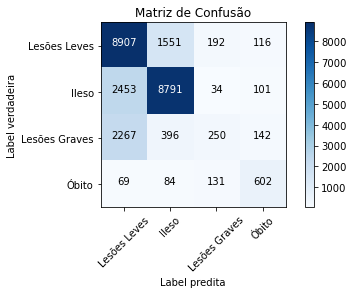

In [123]:
print (m.classification_report(Y_testset, Y_PredTE))

# Gráfico da matriz de confusão sem normalização
plt.figure()
plot_confusion_matrix(cnf_matrix_dt, classes= fset.estado_fisico.unique(), normalize= False,  title='Matriz de Confusão')

[Text(158.28592779503106, 207.55636363636364, 'X[5] <= 0.903\ngini = 0.623\nsamples = 60866\nvalue = [26516, 6967, 25312, 2071]'),
 Text(157.5927600931677, 187.7890909090909, 'X[5] <= -1.138\ngini = 0.628\nsamples = 51708\nvalue = [17358, 6967, 25312, 2071]'),
 Text(68.50446428571429, 168.0218181818182, 'X[11] <= 2.537\ngini = 0.725\nsamples = 5676\nvalue = [1562, 857, 1186, 2071]'),
 Text(41.590062111801245, 148.25454545454545, 'X[12] <= 0.265\ngini = 0.704\nsamples = 4647\nvalue = [1159, 752, 757, 1979]'),
 Text(24.82406832298137, 128.48727272727274, 'X[11] <= 1.001\ngini = 0.66\nsamples = 2735\nvalue = [966, 241, 326, 1202]'),
 Text(15.336335403726709, 108.72, 'X[11] <= -0.264\ngini = 0.671\nsamples = 2375\nvalue = [953, 220, 305, 897]'),
 Text(6.585093167701864, 88.95272727272729, 'X[4] <= -1.747\ngini = 0.672\nsamples = 1203\nvalue = [277, 158, 187, 581]'),
 Text(2.0795031055900624, 69.18545454545455, 'X[3] <= -1.355\ngini = 0.407\nsamples = 126\nvalue = [95, 4, 15, 12]'),
 Text(1

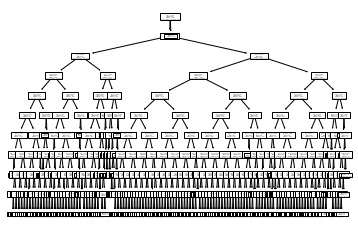

In [125]:
tree.plot_tree(dtclf)

In [33]:
#Importando biliotecas para trabalhar com o algoritmo Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
#Teste com o algoritmo Random Forest Classifier
rfclf = RandomForestClassifier()
rfclf.fit(X_trainset,Y_trainset)

RandomForestClassifier()

In [99]:
#Armazenamento de previões em duas variáveis: uma para os dados de treino e outra para os dados de teste
Y_PredTE2 = fclf.predict(X_testset)
Y_PredTR2 = fclf.predict(X_trainset)

In [100]:
#Verificando a acurácia nos dados de teste e de treino
print('Acurácia p/ dados de Teste: {:.2f}'.format(accuracy_score(Y_testset, Y_PredTE2)))
print('Acurácia p/ dados de Treino: {:.2f}'.format(accuracy_score(Y_trainset, Y_PredTR2)))

Acurácia p/ dados de Teste: 0.71
Acurácia p/ dados de Treino: 0.96


In [101]:
#Verificando erros de classificação nos dados de teste e de treino
print('Erros de classificação das amostras Teste: {}'.format((Y_testset != Y_PredTE2).sum()),'\nAmostras de teste "y": {}'.format(Y_testset.shape[0]))
print('Erros de classificação das amostras Treino: {}'.format((Y_trainset != Y_PredTR2).sum()),'\nAmostras de treino "y": {}'.format(Y_trainset.shape[0]))

Erros de classificação das amostras Teste: 7601 
Amostras de teste "y": 26086
Erros de classificação das amostras Treino: 2623 
Amostras de treino "y": 60866


In [102]:
#Obtendo o Índice Jaccard dos dados de teste e treino
print('Indice Jaccard p/ dados de Teste: {:.3f}%'.format(m.jaccard_score(Y_testset, Y_PredTE2, average='micro')))
print('Indice Jaccard p/ dados de Treino: {:.3f}%'.format(m.jaccard_score(Y_trainset, Y_PredTR2, average='micro')))

Indice Jaccard p/ dados de Teste: 0.549%
Indice Jaccard p/ dados de Treino: 0.917%


In [103]:
#Avaliação do modelo com cross validation
scores = cross_val_score(fclf, X_trainset,Y_trainset, cv=5)
scores

array([0.7 , 0.71, 0.7 , 0.71, 0.7 ])

In [104]:
print('KFold: Score Médio da Acurácia = {}'.format(np.mean(scores)))

KFold: Score Médio da Acurácia = 0.7043669673169584


In [105]:
#Encontrando os hyper parâmetros mais adequados por meio do método GridSearch
param_dist = {"n_estimators": list(range(10,210,10)),
              "max_depth": list(range(3,20)),
              "max_features": list(range(1, 10)),
              "min_samples_split": list(range(2, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [106]:
n_iter_search = 50

random_search = RandomizedSearchCV(rfclf, param_distributions=param_dist, scoring='accuracy',
                                   n_iter=n_iter_search)
random_search.fit(X_trainset,Y_trainset)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                    

In [107]:
#Identificando os melhores hiper parâmetros
print('Melhor número de estimadores:', random_search.best_estimator_.get_params()['n_estimators'])
print('Melhor min_samples_split:', random_search.best_estimator_.get_params()['max_depth'])

Melhor número de estimadores: 140
Melhor min_samples_split: 14


In [108]:
#Relação dos hyper parâmetros usados para gerar o melhor score
random_search.best_params_

{'n_estimators': 140,
 'min_samples_split': 9,
 'max_features': 8,
 'max_depth': 14,
 'criterion': 'entropy',
 'bootstrap': True}

In [109]:
#Rank de modelos de acordo com a configuração de hyper parâmetros
results = pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')
for i, row in results.head().iterrows():
    print("Rank do modelo: {}".format(row.rank_test_score))
    print("Score médio de validação: {:.3f} (std: {:.3f})".format(row.mean_test_score, row.std_test_score))
    print("Modelo de hiper parâmetros: {}\n".format(row.params))

Rank do modelo: 1
Score médio de validação: 0.723 (std: 0.004)
Modelo de hiper parâmetros: {'n_estimators': 140, 'min_samples_split': 9, 'max_features': 8, 'max_depth': 14, 'criterion': 'entropy', 'bootstrap': True}

Rank do modelo: 2
Score médio de validação: 0.723 (std: 0.003)
Modelo de hiper parâmetros: {'n_estimators': 90, 'min_samples_split': 4, 'max_features': 9, 'max_depth': 13, 'criterion': 'gini', 'bootstrap': True}

Rank do modelo: 3
Score médio de validação: 0.722 (std: 0.004)
Modelo de hiper parâmetros: {'n_estimators': 100, 'min_samples_split': 4, 'max_features': 6, 'max_depth': 15, 'criterion': 'gini', 'bootstrap': False}

Rank do modelo: 4
Score médio de validação: 0.722 (std: 0.003)
Modelo de hiper parâmetros: {'n_estimators': 120, 'min_samples_split': 3, 'max_features': 8, 'max_depth': 13, 'criterion': 'entropy', 'bootstrap': False}

Rank do modelo: 5
Score médio de validação: 0.722 (std: 0.004)
Modelo de hiper parâmetros: {'n_estimators': 50, 'min_samples_split': 4, '

In [110]:
#Determinação de atributo (feature) de importância
feat_imps = pd.DataFrame({'importance': fclf.feature_importances_}, index=fset.columns[:-1])
feat_imps.sort_values(by='importance', ascending=False, inplace=True)

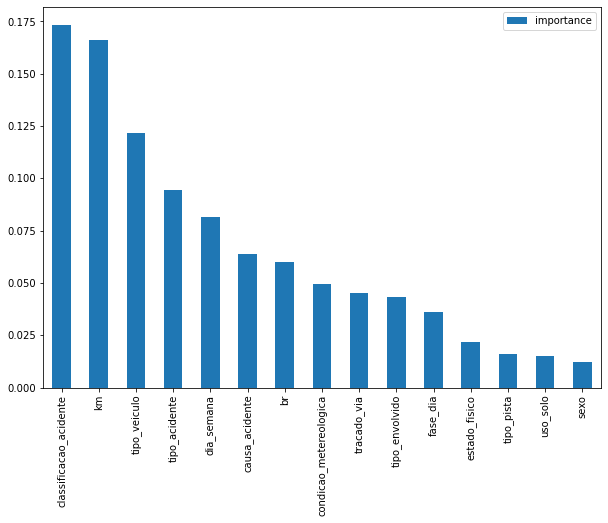

In [111]:
feat_imps.plot(kind='bar', figsize=(10,7))

plt.legend()
plt.show()

In [42]:
#Teste com o algoritmo RandomForest e os hyper parâmetros mais adequados
rfclf = RandomForestClassifier(n_estimators=140, min_samples_split=9, max_features=9, max_depth=13, criterion='gini', bootstrap=True)
rfclf.fit(X_trainset,Y_trainset)
Y_PredTE2 = rfclf.predict(X_testset)
Y_PredTR2 = rfclf.predict(X_trainset)
print('Acurácia p/ dados de Teste: {:.2f}'.format(accuracy_score(Y_testset, Y_PredTE2)))
print('Acurácia p/ dados de Treino: {:.2f}'.format(accuracy_score(Y_trainset, Y_PredTR2)))
print('Erros de classificação das amostras Teste: {}'.format((Y_testset != Y_PredTE2).sum()),'\nAmostras de teste "y": {}'.format(Y_testset.shape[0]))
print('Erros de classificação das amostras Treino: {}'.format((Y_trainset != Y_PredTR2).sum()),'\nAmostras de treino "y": {}'.format(Y_trainset.shape[0]))
print('Indice Jaccard p/ dados de Teste: {:.3f}%'.format(m.jaccard_score(Y_testset, Y_PredTE2, average='micro')))
print('Indice Jaccard p/ dados de Treino: {:.3f}%'.format(m.jaccard_score(Y_trainset, Y_PredTR2, average='micro')))

Acurácia p/ dados de Teste: 0.72
Acurácia p/ dados de Treino: 0.75
Erros de classificação das amostras Teste: 7283 
Amostras de teste "y": 26086
Erros de classificação das amostras Treino: 15029 
Amostras de treino "y": 60866
Indice Jaccard p/ dados de Teste: 0.563%
Indice Jaccard p/ dados de Treino: 0.604%


In [43]:
#Cálculo da matriz de confusão
cnf_matrix_rf = m.confusion_matrix(Y_testset, Y_PredTE2, labels = fset.estado_fisico.unique())
np.set_printoptions(precision=2)

               precision    recall  f1-score   support

        Ileso       0.83      0.78      0.80     11379
Lesões Graves       0.47      0.10      0.16      3055
 Lesões Leves       0.66      0.84      0.74     10766
        Óbito       0.61      0.73      0.66       886

     accuracy                           0.72     26086
    macro avg       0.64      0.61      0.59     26086
 weighted avg       0.71      0.72      0.69     26086

Matriz de confusão sem normalização
[[9016 1419  184  147]
 [2390 8851   31  107]
 [2251  352  291  161]
 [  51   76  114  645]]


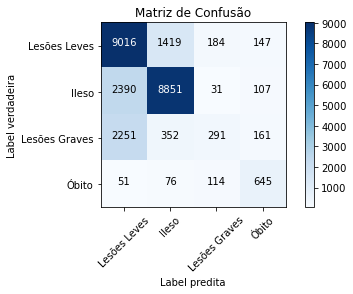

In [44]:
print (m.classification_report(Y_testset, Y_PredTE2))

# Gráfico da matriz de confusão sem normalização
plt.figure()
plot_confusion_matrix(cnf_matrix_rf, classes= fset.estado_fisico.unique(), normalize= False,  title='Matriz de Confusão')

In [45]:
#Montagem de um novo dataset para implementar o modelo escolhido de ML, o do RandomForest
acidentes_mg.reset_index(inplace = True)
fset2 = acidentes_mg[['dia_semana','br','km','causa_acidente','tipo_acidente','classificacao_acidente','fase_dia', 'condicao_metereologica', 'tipo_pista','tracado_via','uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo', 'elemento_transito']].copy()
fset2.head()

,dia_semana,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,elemento_transito
0,domingo,381,605.0,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Condutor,Lesões Leves,Masculino,Homem
1,domingo,381,605.0,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,Homem
2,domingo,262,368.0,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Masculino,Homem
3,domingo,262,368.0,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Feminino,Homem
4,domingo,262,368.0,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Condutor,Lesões Leves,Masculino,Homem


In [46]:
#Juntando os indices dos registros de 'estado_fisico' = 'Não Informado' na variável f1
f1 = fset2.loc[fset2['estado_fisico'] == 'Não Informado'].index

In [47]:
#Verificando a variável f1
f1

Int64Index([   22,    45,    62,   102,   163,   164,   165,   180,   242,   243,
            ...
            91643, 91644, 91654, 91655, 91701, 91702, 91711, 91729, 91775, 91784], dtype='int64', length=4837)

In [48]:
#Tratamento dos registros que o estado_fisico está como Não Informado - retirando a coluna alvo (target)
fset2.drop(labels= 'estado_fisico', axis= 1, inplace= True)

In [49]:
#Verificando as colunas de fset2
fset2.columns

Index(['dia_semana', 'br', 'km', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'sexo', 'elemento_transito'], dtype='object')

In [51]:
#Verificando os valores de fset2
fset2.values

array([['domingo', 381, 605.0, ..., 'Condutor', 'Masculino', 'Homem'],
       ['domingo', 381, 605.0, ..., 'Passageiro', 'Masculino', 'Homem'],
       ['domingo', 262, 368.0, ..., 'Passageiro', 'Masculino', 'Homem'],
       ...,
       ['sexta-feira', 116, 648.0, ..., 'Condutor', 'Feminino', 'Homem'],
       ['sexta-feira', 116, 648.0, ..., 'Condutor', 'Masculino', 'Homem'],
       ['sábado', 153, 7.0, ..., 'Condutor', 'Masculino', 'Via']],
      dtype=object)

In [52]:
#Transformando os valores de X2 em numéricos e normalizando os dados (X2std)
X2 = fset2.values
X2[:,0] = LE_Dia_Semana.transform(X2[:,0])
X2[:,3] = LE_Causa.transform(X2[:,3])
X2[:,4] = LE_Tipo_Acidente.transform(X2[:,4])
X2[:,5] = LE_Class_acidente.transform(X2[:,5])
X2[:,6] = LE_Fase_Dia.transform(X2[:,6])
X2[:,7] = LE_Condicao_Met.transform(X2[:,7])
X2[:,8] = LE_Tipo_Pista.transform(X2[:,8])
X2[:,9] = LE_Tracado_Via.transform(X2[:,9])
X2[:,10] = LE_Uso_Solo.transform(X2[:,10])
X2[:,11] = LE_Tipo_Veiculo.transform(X2[:,11])
X2[:,12] = LE_Tipo_Envolvido.transform(X2[:,12])
X2[:,13] = LE_Sexo.transform(X2[:,13])
X2[:,14] = LE_Elemento_Transito.transform(X2[:,14])
X2std = std.transform(X2)

In [53]:
#O novo dataset (fset2) recebe uma nova coluna 'estado_fisico' apenas com as previsões do modelo escolhido de ML, o do RandomForest
fset2['estado_fisico'] = rfclf.predict(X2std)

In [54]:
#Verificando as colunas fset2 com a inclusão de 'estado_fisico'
fset2.columns

Index(['dia_semana', 'br', 'km', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'sexo', 'elemento_transito', 'estado_fisico'], dtype='object')

In [55]:
#Verificando os valores de fset2 com a inclusão de 'estado_fisico'
fset2.values

array([['domingo', 381, 605.0, ..., 'Masculino', 'Homem', 'Lesões Leves'],
       ['domingo', 381, 605.0, ..., 'Masculino', 'Homem', 'Lesões Leves'],
       ['domingo', 262, 368.0, ..., 'Masculino', 'Homem', 'Lesões Leves'],
       ...,
       ['sexta-feira', 116, 648.0, ..., 'Feminino', 'Homem',
        'Lesões Leves'],
       ['sexta-feira', 116, 648.0, ..., 'Masculino', 'Homem', 'Ileso'],
       ['sábado', 153, 7.0, ..., 'Masculino', 'Via', 'Ileso']],
      dtype=object)

In [56]:
#Verificando as colunas de acidentes_mg
acidentes_mg.columns

Index(['index', 'id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude', 'elemento_transito'], dtype='object')

In [58]:
acidentes_mg.iloc[:10,20]

0    Lesões Leves
1    Lesões Leves
2    Lesões Leves
3    Lesões Leves
4    Lesões Leves
5           Ileso
6    Lesões Leves
7           Ileso
8           Ileso
9    Lesões Leves
Name: estado_fisico, dtype: object

In [59]:
fset2.iloc[:10,15]

0    Lesões Leves
1    Lesões Leves
2    Lesões Leves
3    Lesões Leves
4    Lesões Leves
5           Ileso
6    Lesões Leves
7    Lesões Leves
8    Lesões Leves
9    Lesões Leves
Name: estado_fisico, dtype: object

In [60]:
#Atualização das informações em um novo "dataset" acidentes_mg - parte 1
with pd.option_context('max_column',45): #Usado na construção do loop para ver cada registro
    for i in f1:
        acidentes_mg.iloc[i,20] = fset2.iloc[i,15]

In [61]:
#Atualização das informações em um novo "dataset" acidentes_mg - parte 2
for i in f1:
    acidentes_mg.at[i,'estado_fisico'] = fset2.at[i,'estado_fisico']

In [63]:
#Salvando as modificações feitas do novo "dataset" acidentes_mg
acidentes_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg4.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [68]:
#Verificação e ajuste dos dados em acidentes com as predições
acidentes_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg4.csv", sep=';', decimal=',', encoding = 'cp1252', parse_dates = ['data_inversa'])
acidentes_mg.drop(labels=['index'],axis= 1, inplace= True)

In [69]:
#Verificando o dataset modificado de acidentes
acidentes_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91789 entries, 0 to 91788
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      91789 non-null  int64         
 1   pesid                   91789 non-null  int64         
 2   data_inversa            91789 non-null  datetime64[ns]
 3   dia_semana              91789 non-null  object        
 4   horario                 91789 non-null  object        
 5   uf                      91789 non-null  object        
 6   br                      91789 non-null  int64         
 7   km                      91789 non-null  float64       
 8   municipio               91789 non-null  object        
 9   causa_acidente          91789 non-null  object        
 10  tipo_acidente           91789 non-null  object        
 11  classificacao_acidente  91789 non-null  object        
 12  fase_dia                91789 non-null  object

In [71]:
#Verificando a f1 para que seja comparada com acidentes_mg
f1

Int64Index([   22,    45,    62,   102,   163,   164,   165,   180,   242,   243,
            ...
            91643, 91644, 91654, 91655, 91701, 91702, 91711, 91729, 91775, 91784], dtype='int64', length=4837)

In [73]:
#Verificando o dataset modificado de acidentes
acidentes_mg.head(23)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,elemento_transito
0,47,44,2017-01-01,domingo,04:50:00,MG,381,605.0,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Condutor,Lesões Leves,Masculino,0,1,0,0,-20.6370,-44.7357,Homem
1,47,45,2017-01-01,domingo,04:50:00,MG,381,605.0,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,0,1,0,0,-20.6370,-44.7357,Homem
2,52,1528,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Masculino,0,1,0,0,-19.9566,-44.3444,Homem
3,52,1526,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Feminino,0,1,0,0,-19.9566,-44.3444,Homem
4,52,1519,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Condutor,Lesões Leves,Masculino,0,1,0,0,-19.9566,-44.3444,Homem
5,53,49,2017-01-01,domingo,05:00:00,MG,459,14.0,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Céu Claro,Simples,Curva,Rural,Automóvel,Condutor,Ileso,Feminino,1,0,0,0,-21.8459,-46.4388,Homem
6,61,38,2017-01-01,domingo,05:00:00,MG,262,186.0,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Curva,Rural,Automóvel,Condutor,Lesões Leves,Masculino,0,1,0,0,-19.8942,-43.0403,Homem
7,63,1608,2017-01-01,domingo,06:00:00,MG,135,408.0,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Céu Claro,Simples,Reta,Rural,Automóvel,Passageiro,Ileso,Masculino,1,0,0,0,-16.9614,-43.8590,Via
8,63,1606,2017-01-01,domingo,06:00:00,MG,135,408.0,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Céu Claro,Simples,Reta,Rural,Automóvel,Passageiro,Ileso,Feminino,1,0,0,0,-16.9614,-43.8590,Via
9,63,1604,2017-01-01,domingo,06:00:00,MG,135,408.0,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Céu Claro,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Masculino,0,1,0,0,-16.9614,-43.8590,Via


In [75]:
#Convertendo 'estado_fisico' numa variável dummy 'vitimas'
vitimas = pd.get_dummies(acidentes_mg['estado_fisico'])

In [76]:
#Verificando a variável dummy 'vitimas'
vitimas

,Ileso,Lesões Graves,Lesões Leves,Óbito
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
91784,0,0,1,0
91785,0,0,1,0
91786,0,1,0,0
91787,1,0,0,0


In [79]:
#Elimiando as colunas de'ilesos','feridos_leves','feridos_graves','mortos' de acidentes_mg
acidentes_mg.drop(labels=['ilesos','feridos_leves','feridos_graves','mortos'],axis= 1, inplace = True)

In [80]:
#Unindo acidentes_mg com a variável dummy 'vitimas'
acidentes_mg = pd.concat([acidentes_mg, vitimas], axis= 1, join='outer')

In [82]:
#Verificando o dataset novamente modificado de acidentes
acidentes_mg.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,latitude,longitude,elemento_transito,Ileso,Lesões Graves,Lesões Leves,Óbito
0,47,44,2017-01-01,domingo,04:50:00,MG,381,605.0,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Condutor,Lesões Leves,Masculino,-20.6370,-44.7357,Homem,0,0,1,0
1,47,45,2017-01-01,domingo,04:50:00,MG,381,605.0,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,-20.6370,-44.7357,Homem,0,0,1,0
2,52,1528,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Masculino,-19.9566,-44.3444,Homem,0,0,1,0
3,52,1526,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Feminino,-19.9566,-44.3444,Homem,0,0,1,0
4,52,1519,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Condutor,Lesões Leves,Masculino,-19.9566,-44.3444,Homem,0,0,1,0


In [83]:
#Renomeando as colunas de acidentes
acidentes_mg.rename(mapper={'Ileso':'ilesos', 'Lesões Leves':'feridos_leves', 'Lesões Graves':'feridos_graves','Óbito':'mortos'}, axis= 1, inplace= True)

In [28]:
#Verificando o dataset novamente modificado de acidentes
acidentes_mg.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,latitude,longitude,elemento_transito,ilesos,feridos_graves,feridos_leves,mortos
0,47,44,2017-01-01,domingo,04:50:00,MG,381,605.0,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Condutor,Lesões Leves,Masculino,-20.6370,-44.7357,Homem,0,0,1,0
1,47,45,2017-01-01,domingo,04:50:00,MG,381,605.0,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,-20.6370,-44.7357,Homem,0,0,1,0
2,52,1528,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Masculino,-19.9566,-44.3444,Homem,0,0,1,0
3,52,1526,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Feminino,-19.9566,-44.3444,Homem,0,0,1,0
4,52,1519,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Condutor,Lesões Leves,Masculino,-19.9566,-44.3444,Homem,0,0,1,0


In [85]:
#Verificando o dataset novamente modificado de acidentes
acidentes_mg['estado_fisico'].value_counts()

Ileso            40160
Lesões Leves     37775
Lesões Graves    10382
Óbito             3472
Name: estado_fisico, dtype: int64

In [29]:
#Confirmando os valores alterados de acidentes
print('Total de pessoas envolvidas: ', acidentes_mg['id'].count())
print('Ilesos: ',acidentes_mg.ilesos.sum())
print('Feridos Leves: ',acidentes_mg.feridos_leves.sum())
print('Feridos Graves: ',acidentes_mg.feridos_graves.sum())
print('Mortos: ',acidentes_mg.mortos.sum())

Total de pessoas envolvidas:  91789
Ilesos:  40160
Feridos Leves:  37775
Feridos Graves:  10382
Mortos:  3472


In [89]:
#Confirmando a estrutura de acidentes
acidentes_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91789 entries, 0 to 91788
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      91789 non-null  int64         
 1   pesid                   91789 non-null  int64         
 2   data_inversa            91789 non-null  datetime64[ns]
 3   dia_semana              91789 non-null  object        
 4   horario                 91789 non-null  object        
 5   uf                      91789 non-null  object        
 6   br                      91789 non-null  int64         
 7   km                      91789 non-null  float64       
 8   municipio               91789 non-null  object        
 9   causa_acidente          91789 non-null  object        
 10  tipo_acidente           91789 non-null  object        
 11  classificacao_acidente  91789 non-null  object        
 12  fase_dia                91789 non-null  object

In [87]:
#Verificando que não existem valores nulos
acidentes_mg.isnull().sum()

id                        0
pesid                     0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
tipo_veiculo              0
tipo_envolvido            0
estado_fisico             0
sexo                      0
latitude                  0
longitude                 0
elemento_transito         0
ilesos                    0
feridos_graves            0
feridos_leves             0
mortos                    0
dtype: int64

In [90]:
#Salvando as modificações feitas do novo "dataset" acidentes_mg
acidentes_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg5.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [216]:
#Lendo os arquivos de acidentes e datatran
datatran_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg3.csv", sep=';', decimal=',', encoding = 'cp1252', parse_dates = ['data_inversa'])
acidentes_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg5.csv", sep=';', decimal=',', encoding = 'cp1252', parse_dates = ['data_inversa'])

In [217]:
#Confirmando a estrutura de datatran
datatran_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38835 entries, 0 to 38834
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38835 non-null  int64         
 1   data_inversa            38835 non-null  datetime64[ns]
 2   dia_semana              38835 non-null  object        
 3   horario                 38835 non-null  object        
 4   uf                      38835 non-null  object        
 5   br                      38835 non-null  int64         
 6   km                      38835 non-null  int64         
 7   municipio               38835 non-null  object        
 8   causa_acidente          38835 non-null  object        
 9   tipo_acidente           38835 non-null  object        
 10  classificacao_acidente  38835 non-null  object        
 11  fase_dia                38835 non-null  object        
 12  condicao_metereologica  38835 non-null  object

In [218]:
#Verificando a estrutura e dados de datatran
datatran_mg.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,elemento_transito
0,47,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,2,0,2,0,0,0,2,1,-20.6370,-44.7357,Homem
1,52,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,3,0,3,0,0,0,3,1,-19.9566,-44.3444,Homem
2,53,2017-01-01,domingo,05:00:00,MG,459,14,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Céu Claro,Simples,Curva,Rural,1,0,0,0,1,0,0,1,-21.8459,-46.4388,Homem
3,61,2017-01-01,domingo,05:00:00,MG,262,186,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Curva,Rural,1,0,1,0,0,0,1,1,-19.8942,-43.0403,Homem
4,63,2017-01-01,domingo,06:00:00,MG,135,408,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Céu Claro,Simples,Reta,Rural,3,0,1,0,2,0,1,1,-16.9614,-43.8590,Via


In [219]:
#Agregando os valores por estado das vítimas em acidentes
estado_vitimas = pd.DataFrame(acidentes_mg.groupby(acidentes_mg['id']).agg({'ilesos' : 'sum', 'feridos_graves' : 'sum', 'feridos_leves' : 'sum', 'mortos' : 'sum'}).reset_index())
estado_vitimas.drop(labels=['id'],axis= 1, inplace = True)

In [220]:
#Verificando 'estado_vitimas'
estado_vitimas

,ilesos,feridos_graves,feridos_leves,mortos
0,0,0,2,0
1,0,0,3,0
2,1,0,0,0
3,0,0,1,0
4,2,0,1,0
...,...,...,...,...
38830,0,1,0,0
38831,0,0,1,0
38832,0,0,2,0
38833,1,1,0,0


In [221]:
#Confirmando a quantidade de vítimas que vieram a óbito
estado_vitimas['mortos'].sum()

3472

In [222]:
#Verificando a quantidade de 'ignorados' em datatran
datatran_mg['ignorados'].sum()
#valor é igual ao de 'Não Informado' em acidentes

4837

In [223]:
#Unindo datatran_mg com a 'estado_vitimas'
datatran_mg.drop(labels=['ilesos','feridos_leves','feridos_graves','mortos','ignorados'],axis= 1, inplace = True)
datatran_mg = pd.concat([datatran_mg, estado_vitimas], axis= 1, join='outer')

In [224]:
datatran_mg.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,feridos,veiculos,latitude,longitude,elemento_transito,ilesos,feridos_graves,feridos_leves,mortos
0,47,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,2,2,1,-20.6370,-44.7357,Homem,0,0,2,0
1,52,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,3,3,1,-19.9566,-44.3444,Homem,0,0,3,0
2,53,2017-01-01,domingo,05:00:00,MG,459,14,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Céu Claro,Simples,Curva,Rural,1,0,1,-21.8459,-46.4388,Homem,1,0,0,0
3,61,2017-01-01,domingo,05:00:00,MG,262,186,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Curva,Rural,1,1,1,-19.8942,-43.0403,Homem,0,0,1,0
4,63,2017-01-01,domingo,06:00:00,MG,135,408,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Céu Claro,Simples,Reta,Rural,3,1,1,-16.9614,-43.8590,Via,2,0,1,0


In [225]:
#Corrigindo o valor do atributo de 'feridos' para os novos dados de 'feridos_graves' e 'feridos_leves'
datatran_mg['feridos'] = datatran_mg['feridos_graves'] + datatran_mg['feridos_leves']

In [226]:
#Confirmando os valores alterados de datatran segundo o modelo que rodou em acidentes
print('Total de pessoas envolvidas: ', datatran_mg['pessoas'].sum())
print('Ilesos: ',datatran_mg.ilesos.sum())
print('Feridos Leves: ',datatran_mg.feridos_leves.sum())
print('Feridos Graves: ',datatran_mg.feridos_graves.sum())
print('Mortos: ',datatran_mg.mortos.sum())

Total de pessoas envolvidas:  91789
Ilesos:  40160
Feridos Leves:  37775
Feridos Graves:  10382
Mortos:  3472


In [227]:
#Realizando ajustes na coluna 'classificacao_acidente'
fset3 = datatran_mg[['classificacao_acidente','ilesos','feridos_leves','feridos_graves','mortos']].copy()
fset3.head()

,classificacao_acidente,ilesos,feridos_leves,feridos_graves,mortos
0,Com Vítimas Feridas,0,2,0,0
1,Com Vítimas Feridas,0,3,0,0
2,Sem Vítimas,1,0,0,0
3,Com Vítimas Feridas,0,1,0,0
4,Com Vítimas Feridas,2,1,0,0


In [ ]:
fset3['classificacao_acidente'] = '0'
fset3.loc[(fset3['feridos_leves'] == 0) & (fset3['feridos_graves'] == 0) & (fset3['mortos'] == 0), 'classificacao_acidente'] = 'Sem Vítimas'
fset3.loc[fset3['mortos'] > 0, 'classificacao_acidente'] = 'Com Vítimas Fatais'
fset3.loc[(fset3['feridos_leves'] > 0) & (fset3['feridos_graves'] > 0) & (fset3['mortos'] == 0), 'classificacao_acidente'] = 'Com Vítimas Feridas'
fset3.loc[(fset3['feridos_leves'] > 0) & (fset3['mortos'] == 0), 'classificacao_acidente'] = 'Com Vítimas Feridas'
fset3.loc[(fset3['feridos_graves'] > 0) & (fset3['mortos'] == 0), 'classificacao_acidente'] = 'Com Vítimas Feridas'
fset3.drop(labels=['ilesos','feridos_leves','feridos_graves','mortos'],axis= 1, inplace = True)

In [230]:
#Aplicando a correção de fset3 em datatran
datatran_mg.drop(labels=['classificacao_acidente'],axis= 1, inplace = True)
datatran_mg = pd.concat([datatran_mg, fset3], axis= 1, join='outer')
datatran_mg.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,feridos,veiculos,latitude,longitude,elemento_transito,ilesos,feridos_graves,feridos_leves,mortos,classificacao_acidente
0,47,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Amanhecer,Céu Claro,Dupla,Reta,Rural,2,2,1,-20.6370,-44.7357,Homem,0,0,2,0,Com Vítimas Feridas
1,52,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,3,3,1,-19.9566,-44.3444,Homem,0,0,3,0,Com Vítimas Feridas
2,53,2017-01-01,domingo,05:00:00,MG,459,14,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Amanhecer,Céu Claro,Simples,Curva,Rural,1,0,1,-21.8459,-46.4388,Homem,1,0,0,0,Sem Vítimas
3,61,2017-01-01,domingo,05:00:00,MG,262,186,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Plena Noite,Céu Claro,Simples,Curva,Rural,1,1,1,-19.8942,-43.0403,Homem,0,0,1,0,Com Vítimas Feridas
4,63,2017-01-01,domingo,06:00:00,MG,135,408,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Amanhecer,Céu Claro,Simples,Reta,Rural,3,1,1,-16.9614,-43.8590,Via,2,0,1,0,Com Vítimas Feridas


In [232]:
#Salvando as modificações feitas do novo "dataset" datatran_mg
datatran_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg4.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')